# Задание 5

А теперь вернёмся к анализу рекламных кампаний и посчитаем Retention для двух групп пользователей. Возможно, дело именно в том, что один из каналов привёл более активных и заинтересованных пользователей. Давайте это выясним!

Задание:

Для каждой рекламной кампании посчитайте Retention 1-го и 7-го дня у привлечённых пользователей. 

В результат включите четыре колонки: колонку с наименованиями кампаний, дату первого взаимодействия с приложением, количество дней, прошедших с даты первого взаимодействия (порядковый номер), и само значение Retention.

Колонки со значениями назовите соответственно ads_campaign, start_date, day_number, retention.

Наименования кампаний выведите в следующем виде:

1. Кампания № 1
2. Кампания № 2


Метрику необходимо выразить в виде доли, округлив полученные значения до двух знаков после запятой.

Результат должен быть отсортирован сначала по наименованию кампании (по возрастанию), затем по возрастанию порядкового номера дня.

В результат должны попасть следующие дни: нулевой, первый и седьмой.

Поля в результирующей таблице: ads_campaign, start_date, day_number, retention

```sql
WITH camp AS (
  SELECT
    CASE
      WHEN user_id IN (
        8631, 8632, 8638, 8643, 8657, 8673, 8706, 8707, 8715, 8723, 8732, 8739, 8741, 
        8750, 8751, 8752, 8770, 8774, 8788, 8791, 8804, 8810, 8815, 8828, 8830, 8845, 
        8853, 8859, 8867, 8869, 8876, 8879, 8883, 8896, 8909, 8911, 8933, 8940, 8972, 
        8976, 8988, 8990, 9002, 9004, 9009, 9019, 9020, 9035, 9036, 9061, 9069, 9071, 
        9075, 9081, 9085, 9089, 9108, 9113, 9144, 9145, 9146, 9162, 9165, 9167, 9175, 
        9180, 9182, 9197, 9198, 9210, 9223, 9251, 9257, 9278, 9287, 9291, 9313, 9317, 
        9321, 9334, 9351, 9391, 9398, 9414, 9420, 9422, 9431, 9450, 9451, 9454, 9472, 
        9476, 9478, 9491, 9494, 9505, 9512, 9518, 9524, 9526, 9528, 9531, 9535, 9550, 
        9559, 9561, 9562, 9599, 9603, 9605, 9611, 9612, 9615, 9625, 9633, 9652, 9654, 
        9655, 9660, 9662, 9667, 9677, 9679, 9689, 9695, 9720, 9726, 9739, 9740, 9762, 
        9778, 9786, 9794, 9804, 9810, 9813, 9818, 9828, 9831, 9836, 9838, 9845, 9871, 
        9887, 9891, 9896, 9897, 9916, 9945, 9960, 9963, 9965, 9968, 9971, 9993, 9998, 
        9999, 10001, 10013, 10016, 10023, 10030, 10051, 10057, 10064, 10082, 10103, 
        10105, 10122, 10134, 10135
        ) THEN 'Кампания № 1'
      WHEN user_id IN (
        8629, 8630, 8644, 8646, 8650, 8655, 8659, 8660, 8663, 8665, 8670, 8675, 8680, 8681, 
        8682, 8683, 8694, 8697, 8700, 8704, 8712, 8713, 8719, 8729, 8733, 8742, 8748, 8754, 
        8771, 8794, 8795, 8798, 8803, 8805, 8806, 8812, 8814, 8825, 8827, 8838, 8849, 8851, 
        8854, 8855, 8870, 8878, 8882, 8886, 8890, 8893, 8900, 8902, 8913, 8916, 8923, 8929, 
        8935, 8942, 8943, 8949, 8953, 8955, 8966, 8968, 8971, 8973, 8980, 8995, 8999, 9000, 
        9007, 9013, 9041, 9042, 9047, 9064, 9068, 9077, 9082, 9083, 9095, 9103, 9109, 9117, 
        9123, 9127, 9131, 9137, 9140, 9149, 9161, 9179, 9181, 9183, 9185, 9190, 9196, 9203, 
        9207, 9226, 9227, 9229, 9230, 9231, 9250, 9255, 9259, 9267, 9273, 9281, 9282, 9289, 
        9292, 9303, 9310, 9312, 9315, 9327, 9333, 9335, 9337, 9343, 9356, 9368, 9370, 9383, 
        9392, 9404, 9410, 9421, 9428, 9432, 9437, 9468, 9479, 9483, 9485, 9492, 9495, 9497, 
        9498, 9500, 9510, 9527, 9529, 9530, 9538, 9539, 9545, 9557, 9558, 9560, 9564, 9567, 
        9570, 9591, 9596, 9598, 9616, 9631, 9634, 9635, 9636, 9658, 9666, 9672, 9684, 9692, 
        9700, 9704, 9706, 9711, 9719, 9727, 9735, 9741, 9744, 9749, 9752, 9753, 9755, 9757, 
        9764, 9783, 9784, 9788, 9790, 9808, 9820, 9839, 9841, 9843, 9853, 9855, 9859, 9863, 
        9877, 9879, 9880, 9882, 9883, 9885, 9901, 9904, 9908, 9910, 9912, 9920, 9929, 9930, 
        9935, 9939, 9958, 9959, 9961, 9983, 10027, 10033, 10038, 10045, 10047, 10048, 10058, 
        10059, 10067, 10069, 10073, 10075, 10078, 10079, 10081, 10092, 10106, 10110, 10113, 10131
        ) THEN 'Кампания № 2'
    end AS ads_campaign,
    user_id,
    time :: date AS date
  FROM
    user_actions
),
subq AS (
  SELECT
    ads_campaign,
    date,
    ROW_NUMBER() OVER(PARTITION BY ads_campaign) - 1 AS row_num,
    count(DISTINCT user_id) AS count_users
  FROM
    camp
  WHERE
    ads_campaign is NOT NULL
  GROUP BY
    1,
    2
)
SELECT
  ads_campaign,
  (
    SELECT
      min(date)
    FROM
      subq
  ) AS start_date,
  day_number,
  retention
FROM
  (
    SELECT
      ads_campaign,
      date,
      row_num AS day_number,
      round(
        count_users :: decimal / (
          LAG(count_users :: int, row_num :: int) OVER (PARTITION BY ads_campaign)
        ),
        2
      ) AS retention
    FROM
      subq
  ) AS subq2
WHERE
  day_number IN (0, 1, 7)
ORDER BY
  1,
  3
```

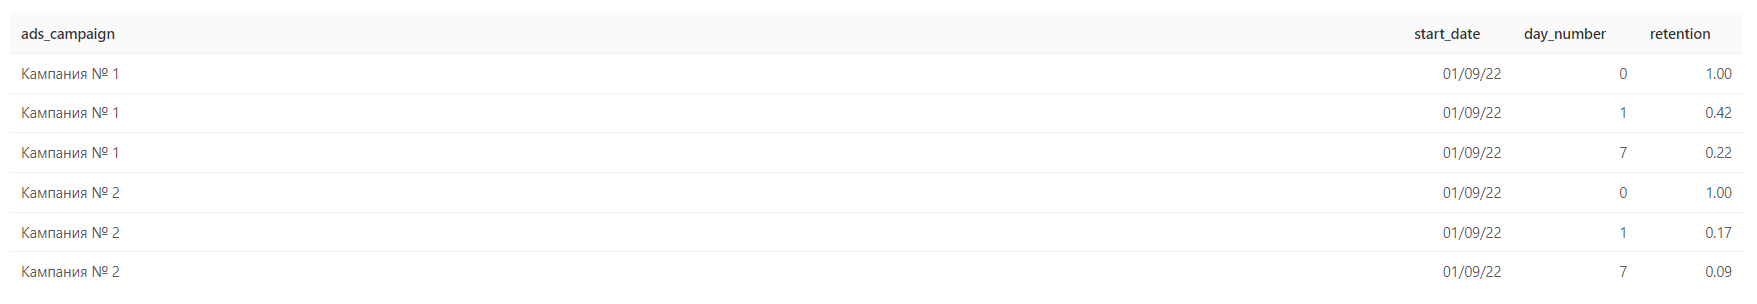

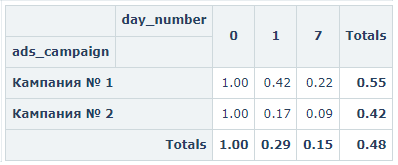